In [2]:
def longestCommonPrefix(s1,s2):
    i = 0
    while i < len(s1) and i < len(s2) and s1[i] == s2[i]:
        i += 1
    return s1[:i]        

In [3]:
longestCommonPrefix('ACCGTG', 'ACCAGAC')

'ACC'

In [4]:
def match(s1,s2):
    if not len(s1) == len(s2):
        return False
    for i in range(len(s1)):
        if not s1[i] == s2[i]:
            return False
    return True

match('ATCGT', 'AACCG')

False

In [5]:
match('ATGCT', 'ATGCT')

True

In [8]:
complement = {'A':'T','C': 'G', "T": "A", "G":'C' }

def reverseComplement(dna):
    t = ''
    for base in dna:
        t = complement[base] + t
    return t


In [9]:
reverseComplement('ACGTC')

'GACGT'

In [13]:
def readGenome(filename):
    genome = ''
    with open(filename, 'r') as f:
        for line in f:
            if not line[0] == '>' :
                genome += line.rstrip()
    return genome

In [14]:
genome = readGenome('lambda_virus.fa')
genome[:100]

'GGGCGGCGACCTCGCGGGTTTTCGCTATTTATGAAAATTTTCCGGTTTAAGGCGTTTCCGTTCTTCTTCGTCATAACTTAATGTTTTTATTTAAAATACC'

In [15]:
len(genome)

48502

In [17]:
def countBase(genome):
    counts = {'A': 0, 'G': 0, 'C' : 0, 'T': 0}

    for base in genome:
        counts[base] += 1
    print(counts)

In [18]:
countBase(genome)

{'A': 12334, 'G': 12820, 'C': 11362, 'T': 11986}


In [19]:
import collections
collections.Counter(genome)

Counter({'G': 12820, 'C': 11362, 'A': 12334, 'T': 11986})

# *Working With sequencing reads*

In [25]:
def readFastq(filename):
    sequences = []
    qualities = []
    with open(filename) as fh:
        while True:
            fh.readline()
            seq = fh.readline().rstrip()
            fh.readline()
            qual = fh.readline().rstrip()
            
            if len(seq) == 0:
                break
            sequences.append(seq)
            qualities.append(qual)
    return sequences, qualities

In [26]:
seqs, quals = readFastq('SRR835775_1.first1000.fastq')

In [27]:
seqs[:5], quals[:5]

(['TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTCACCCTAACCCTAACCCTAACCGTATCCGTCACCCTAACCCTAAC',
  'TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACC',
  'TAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGG',
  'TAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAAGGGTTGGGGGTTAGGGGTAGGGGTAGGGTTA',
  'CTAACCCTAACCCTAACCCTAACCCTACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCAACCCTAACCCTAACCCTCACC'],
 ['???B1ADDD8??BB+C?B+:AA883CEE8?C3@DDD3)?D2;DC?8?=BAD=@C@(.6.6=A?=?@##################################',
  'CCCFFFFFGHHGHJJJJJIJGIIJJJJJJJIJIJJJJJFJJFGIIIIH=CBFCF=CCEG)=>EHB2@@DEC>;;?=;(=?BBD?59?BA###########',
  '@@<DD?DDHHH<CBHII:CFGIGAGHIIG?CCGGE0BDHIIHIGICH8=FHGI=@EHGGGEEHH>);?CC@.;(=;?59,5<A599?CB>ABBCB><88A',
  '@CCFFDDFHHHDFHIJJCGGIJJHIIHJC?DHHIJ0?DGHI9BBFHICGGIGI=CDEGI=?AAEF7@?################################',
  '@<@FDFDDBBFHH@EBGGGEH@FFHE;EHIEGGBHG?)9?8B

In [28]:
def phred33ToQ(qual):
    return ord(qual) - 33

In [29]:
phred33ToQ('#')

2

In [30]:
phred33ToQ('J')

41

In [31]:
def createHist(qualities):
    hist = [0] * 100
    for qual in qualities:
        for phred in qual:
            q = phred33ToQ(phred)
            hist[q] += 1
    return hist
    

In [32]:
h = createHist(quals)
print(h)

[0, 0, 6178, 0, 0, 54, 108, 574, 345, 83, 193, 124, 79, 165, 49, 236, 184, 327, 514, 238, 531, 254, 313, 798, 992, 888, 1396, 1488, 993, 1752, 3387, 4487, 3248, 5476, 8375, 11814, 4243, 7827, 6579, 8179, 9349, 8180, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


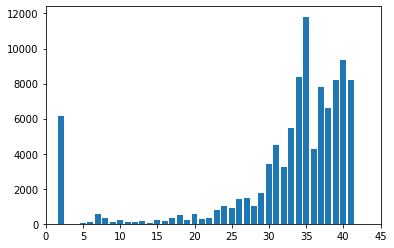

In [40]:
%matplotlib inline 
import matplotlib.pyplot as plt
plt.bar(range(len(h)), h)
plt.xlim([0,45])
plt.show()

In [44]:
def findGCbyPos(reads):
    gc = [0] * 100
    totals = [0] * 100
    
    for read in reads:
        for i  in range(len(read)):
            if read[i] == "C" or read[i] == 'G':
                gc[i] += 1
                totals[i] += 1
        for i in range(len(gc)):
            if totals[i] > 0:
                gc[i] /= float(totals[i])
    return gc

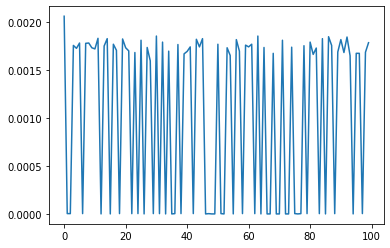

In [45]:
gc = findGCbyPos(seqs)
plt.plot(range(len(gc)), gc)
plt.show()

In [50]:
count = collections.Counter()
for seq in seqs:
    count.update(seq)
    
print(count)

Counter({'G': 28742, 'C': 28272, 'T': 21836, 'A': 21132, 'N': 18})
